In [1]:
import os
import sys

# Adiciona o caminho da pasta `main` ao sys.path
sys.path.append(os.path.abspath("../../"))


In [2]:

# Importar a classe Visualization
from classes.Visualization.visualization import Visualization
import pandas as pd

# Importar os dados
stock_data = pd.read_csv('../../datasets/b3_dados/processed/acoes_concat.csv')
scaled_financial_assets = pd.read_csv('../../datasets/b3_dados/processed/selected_stocks_normalized.csv')

In [3]:
viz = Visualization(stock_data)
viz_scaled = Visualization(scaled_financial_assets)

1. **Gráficos de Barras**\
\
Objetivo: Comparar valores agregados (como média, máximo ou mínimo) entre ações.

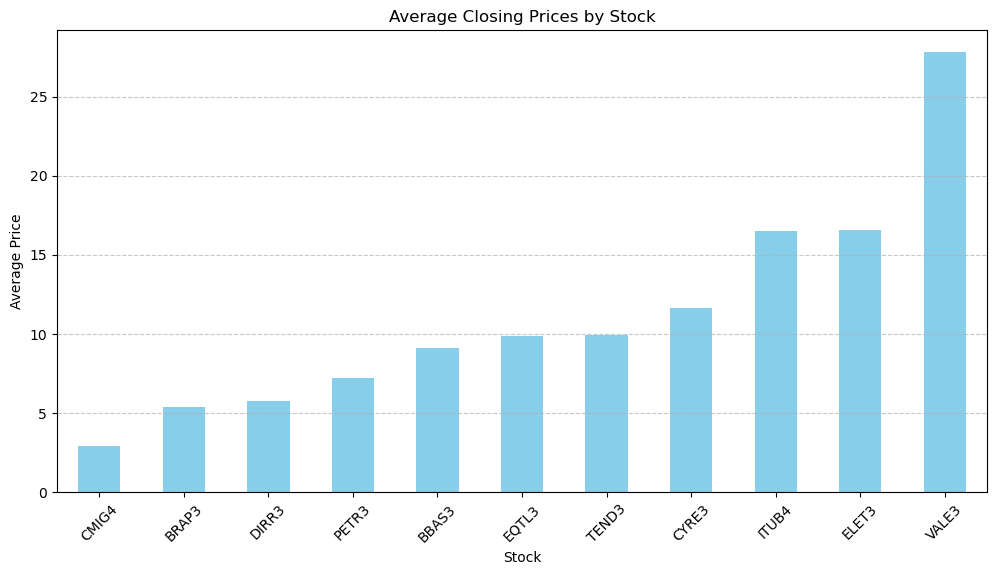

In [12]:
viz.plot_average_prices()


2. **Gráficos de Linhas**\
\
Objetivo: Comparar preços ao longo do tempo para várias ações.

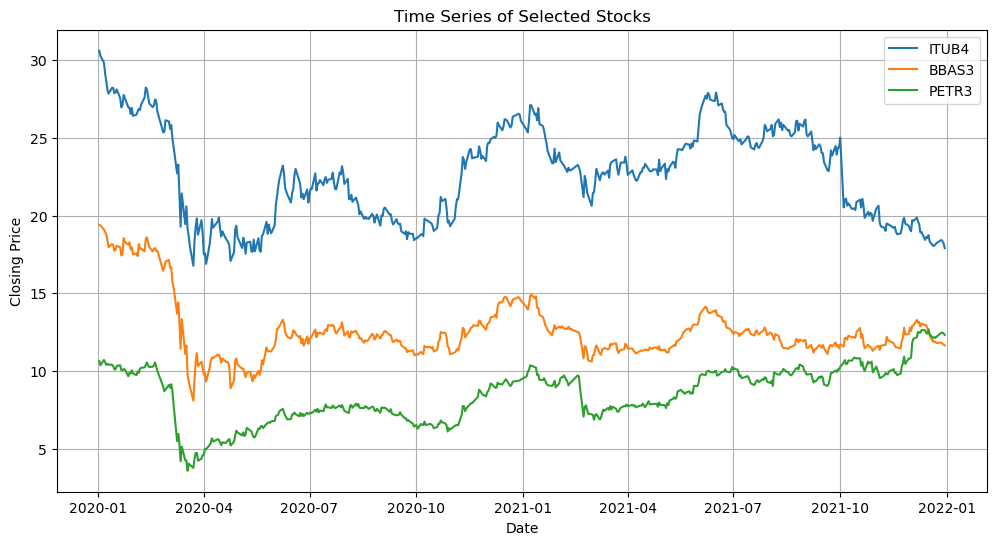

In [4]:
viz.plot_time_series(stocks=['ITUB4', 'BBAS3', 'PETR3'], start_date='2020-01-01', end_date='2022-01-01')

3. **Boxplots**\
\
Objetivo: Comparar a dispersão e os outliers dos preços de diferentes ações.

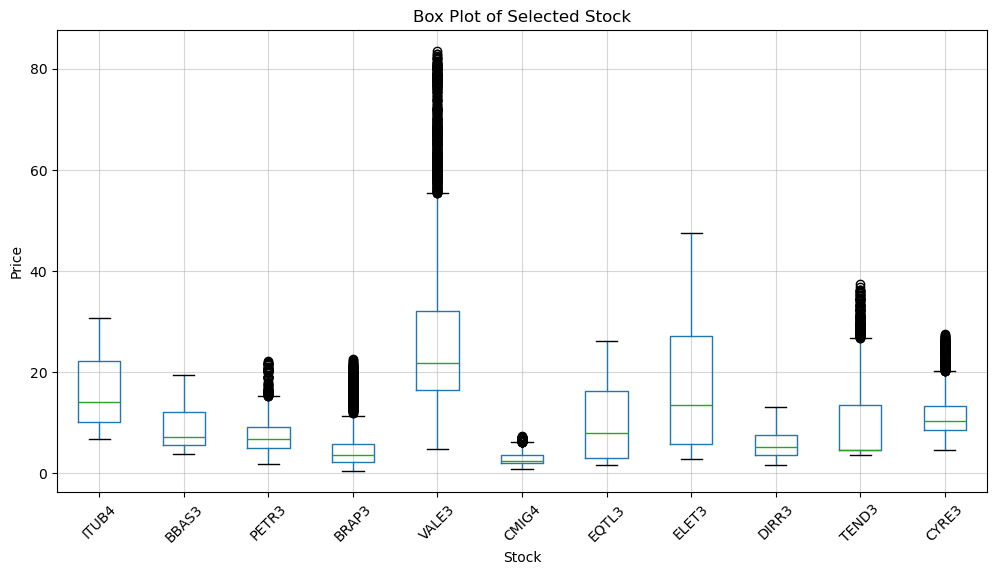

In [5]:
viz.plot_boxplot(stocks=['ITUB4', 'BBAS3', 'PETR3','BRAP3','VALE3','CMIG4','EQTL3','ELET3','DIRR3','TEND3','CYRE3'], title="Box Plot of Selected Stock")

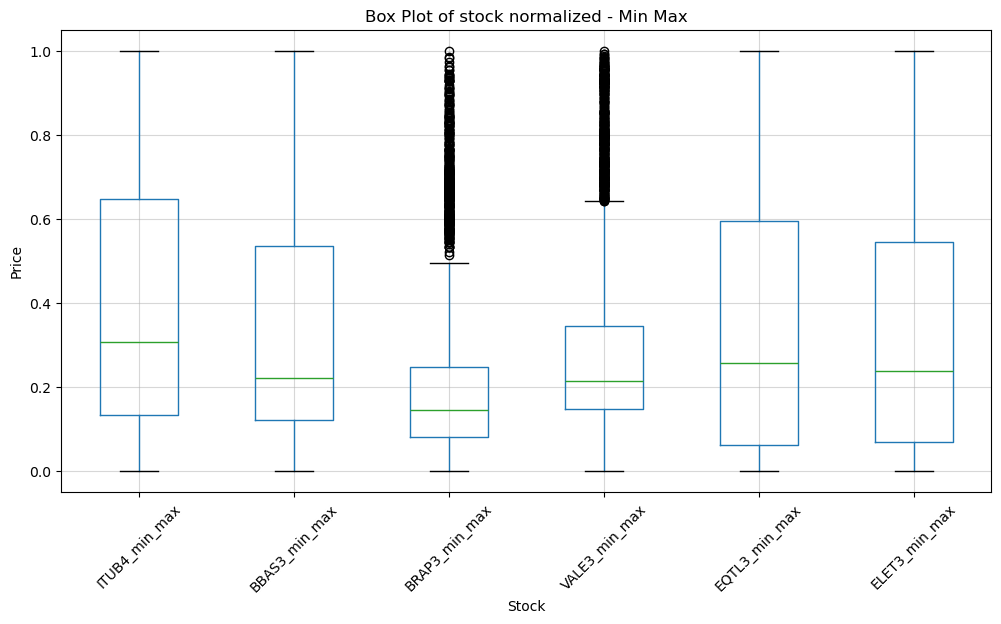

In [6]:
viz_scaled.plot_boxplot(stocks =['ITUB4_min_max', 'BBAS3_min_max','BRAP3_min_max','VALE3_min_max','EQTL3_min_max','ELET3_min_max'], title="Box Plot of stock normalized - Min Max")

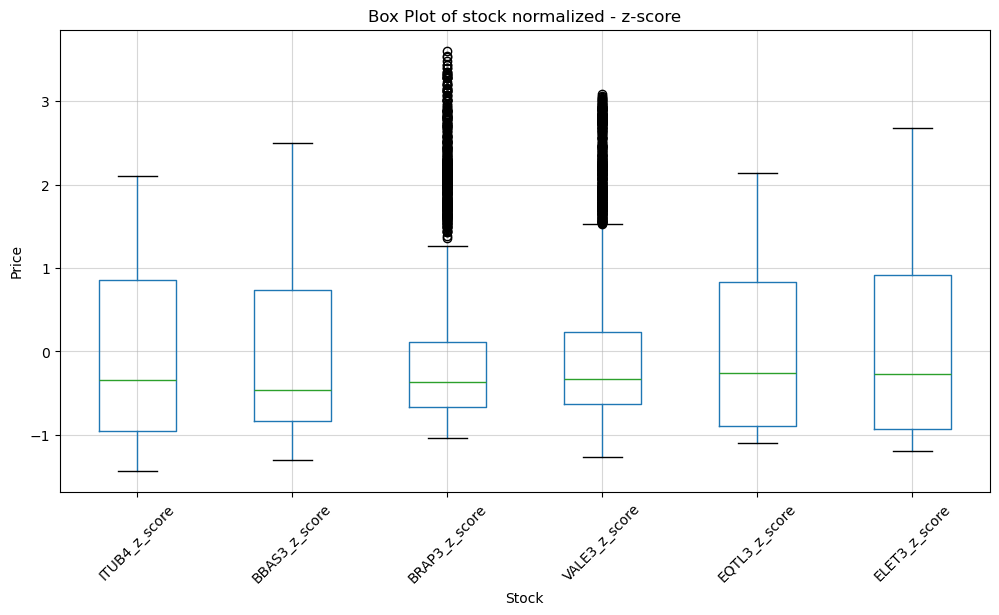

In [7]:
viz_scaled.plot_boxplot(stocks =['ITUB4_z_score', 'BBAS3_z_score','BRAP3_z_score','VALE3_z_score','EQTL3_z_score','ELET3_z_score'], title="Box Plot of stock normalized - z-score")

4. **Heatmaps de Correlação**\
\
Objetivo: Comparar a correlação entre os preços das ações.

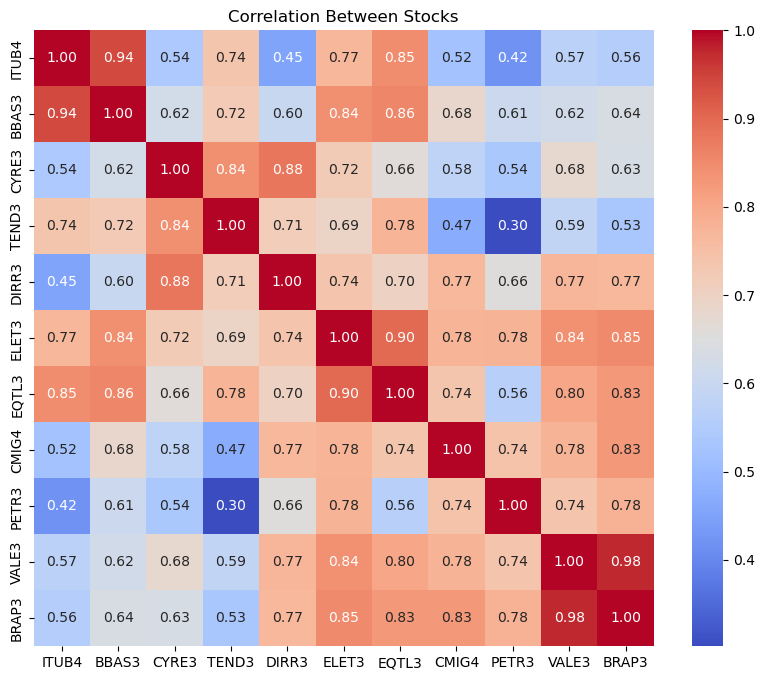

In [8]:
viz.plot_correlation_matrix()

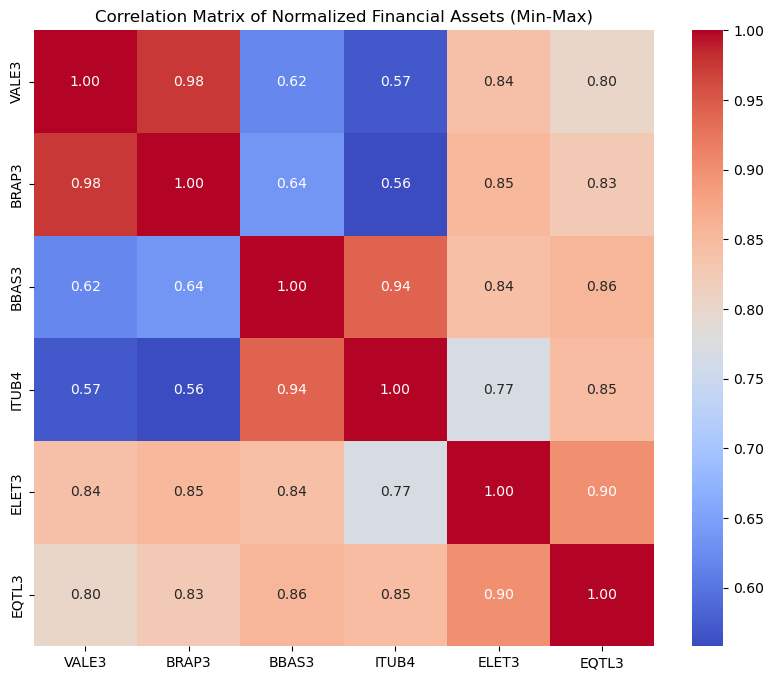

In [9]:
import seaborn as sns
# Seleciona apenas as colunas normalizadas com min-max
min_max_columns = [col for col in scaled_financial_assets.columns if 'min_max' in col]

# Renomeia as colunas para remover a extensão 'min_max'
renamed_columns = {col: col.replace('_min_max', '') for col in min_max_columns}
assets_normalized_renamed = scaled_financial_assets[min_max_columns].rename(columns=renamed_columns)


# Plota a matriz de correlação
viz.plot_correlation_matrix(assets_normalized_renamed, title='Correlation Matrix of Normalized Financial Assets (Min-Max)')


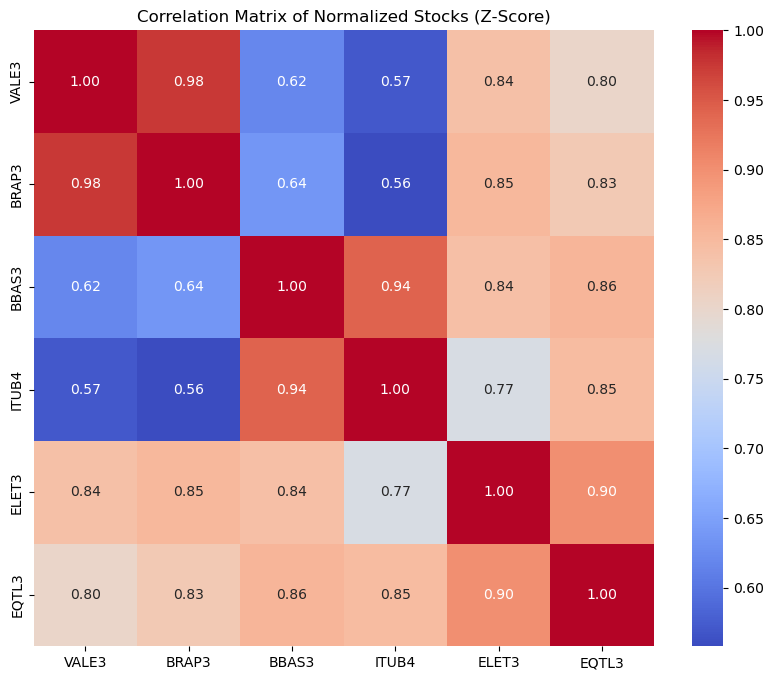

In [10]:
# Seleciona apenas as colunas normalizadas com z-score
z_score_columns = [col for col in scaled_financial_assets.columns if 'z_score' in col]

# Renomeia as colunas para remover a extensão 'z_score'
renamed_z_score_columns = {col: col.replace('_z_score', '') for col in z_score_columns}
assets_normalized_z_score_renamed = scaled_financial_assets[z_score_columns].rename(columns=renamed_z_score_columns)

# Plota a matriz de correlação
viz.plot_correlation_matrix(assets_normalized_z_score_renamed, title='Correlation Matrix of Normalized Stocks (Z-Score)')

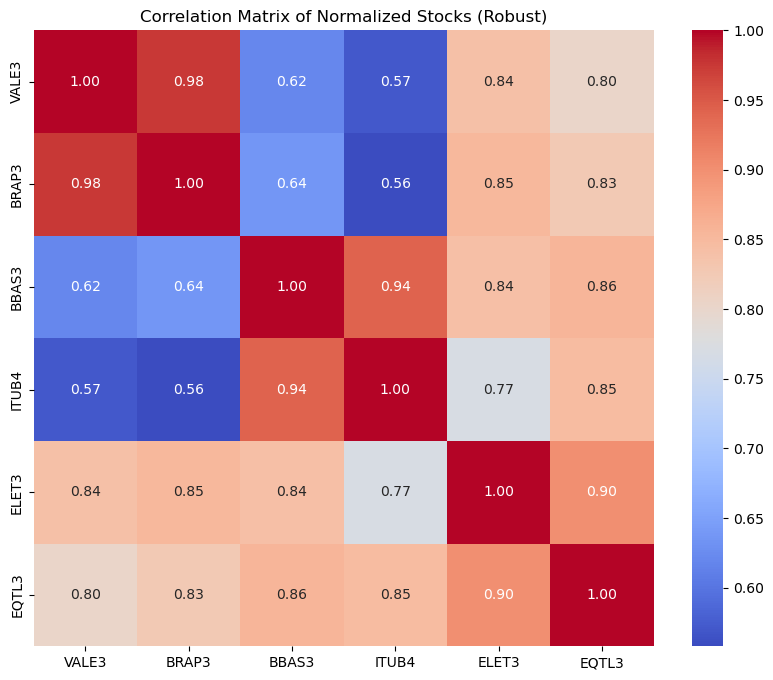

In [11]:
# Seleciona apenas as colunas normalizadas com robust
robust_columns = [col for col in scaled_financial_assets.columns if 'robust' in col]

# Renomeia as colunas para remover a extensão 'robust'
renamed_robust_columns = {col: col.replace('_robust', '') for col in robust_columns}
assets_normalized_robust_renamed = scaled_financial_assets[robust_columns].rename(columns=renamed_robust_columns)

# Plota a matriz de correlação
viz.plot_correlation_matrix(assets_normalized_robust_renamed, title='Correlation Matrix of Normalized Stocks (Robust)')